<a href="https://colab.research.google.com/github/SIDPATEL-9496/Zomato-Customer-review-sentiment-analysis/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [4]:
nf = pd.read_csv('/content/drive/MyDrive/AlmaBetter /ML_Clustering_Capstone_Project/Zomato_Resturant_Clustering_&_Review_Analysis/Sidhartha_Patel/Copy of Zomato Restaurant names and Metadata.csv')
rf = pd.read_csv('/content/drive/MyDrive/AlmaBetter /ML_Clustering_Capstone_Project/Zomato_Resturant_Clustering_&_Review_Analysis/Sidhartha_Patel/Copy of Zomato Restaurant reviews.csv')

In [5]:
nf.shape

(105, 6)

In [6]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [7]:
nf.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [8]:
nf.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [9]:
null_count = nf.isnull().sum()
null_count

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [10]:
nf.nunique()

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

# Basic analysis on review data

In [11]:
# Shape of the data
rf.shape

(10000, 7)

In [12]:
rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [13]:
rf.shape

(10000, 7)

In [14]:
rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [15]:
rf.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [16]:
rf.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


In [17]:
null = rf.isnull().sum()
null

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [18]:
rf.nunique()

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

In [19]:
rf['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

# Merging the datasets

In [20]:
#Changing the column name for convenience while merging
nf = nf.rename(columns={'Name':'Restaurant'})

# Merging the two dataframes
df = pd.merge(nf, rf, how = 'left', on = 'Restaurant')

In [21]:
df.head()

,Restaurant,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0.0
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0.0
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0


# Data Cleaning

In [22]:
# Dropping the unwanted columns
df.drop(['Time', 'Links', 'Collections'], axis=1, inplace=True)

In [23]:
print(df.isnull().sum())

Restaurant      0
Cost            0
Cuisines        0
Timings       100
Reviewer       43
Review         50
Rating         43
Metadata       43
Pictures        5
dtype: int64


In [24]:
#Dropping the row in which we got invalid entry for Rating
df = df[df['Rating']!='Like']

In [25]:
# rows with Review,Rating,Metadata as null values
df[(df['Review'].isnull())&(df['Rating'].isnull())&(df['Metadata'].isnull())].shape[0]

43

In [26]:
#removing all the rows with null values
df = df[(df['Review'].notna())&(df['Timings'].notna())]

In [27]:
print(df.isnull().sum())

Restaurant    0
Cost          0
Cuisines      0
Timings       0
Reviewer      0
Review        0
Rating        0
Metadata      0
Pictures      0
dtype: int64


# Data Preprocessing

In [28]:
#Datatypes of our dataframe
df.dtypes

Restaurant     object
Cost           object
Cuisines       object
Timings        object
Reviewer       object
Review         object
Rating         object
Metadata       object
Pictures      float64
dtype: object

In [29]:
#Changing the datatypes of Restaurant, Review
df['Restaurant'] = df['Restaurant'].astype(str)
df['Review'] = df['Review'].astype(str)
df['Rating'] = df['Rating'].astype(float)

In [30]:
# Cost values are separated by comma in general (22,500 = 22500)
df['Cost'] = df['Cost'].str.replace(',','').astype(int)

In [31]:
# Making a cuisine list for every restaurant
df['Cuisines'] = df['Cuisines'].str.split(',')

In [32]:
df.sample(5)

,Restaurant,Cost,Cuisines,Timings,Reviewer,Review,Rating,Metadata,Pictures
23,Beyond Flavours,800,"[Chinese, Continental, Kebab, European, So...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Tony,We had our farewell feast here recently enjoye...,5.0,"8 Reviews , 25 Followers",0.0
1320,The Lal Street - Bar Exchange,1300,"[North Indian, Italian, Finger Food]",12noon to 12midnight (Mon-Sun),The Food O’Clock,"To enter this bar, you have to go from the mai...",4.0,"25 Reviews , 13 Followers",3.0
2252,B-Dubs,1600,[American],"11am to 11:30pm (Mon, Tue, Wed, Thu, Sun), 11a...",Ragaswanth,Its been first time to this place and its awes...,5.0,"2 Reviews , 3 Followers",0.0
2285,B-Dubs,1600,[American],"11am to 11:30pm (Mon, Tue, Wed, Thu, Sun), 11a...",Abhi Bhat,Anil patil and sai raj have served us very wel...,5.0,"9 Reviews , 26 Followers",0.0
3338,Club Rogue,900,"[North Indian, Fast Food]",11 AM to 12 Midnight,HarshaJ Harry,Went to this place to watch ipl match which wa...,1.0,"1 Review , 1 Follower",0.0


In [33]:
# Function to split the meta data into reviews count and followers count
def meta_split(row):
    reviews = int(row.split(',')[0].split()[0])
    try :
        followers = int(row.split(',')[1].split()[0])
    except:
        followers = 0
    return reviews,followers

In [34]:
#Dividing Metadata into reviews and followers column
df['reviews'],df['followers'] = zip(*df['Metadata'].map(meta_split))

#Dropping metadata
df = df.drop('Metadata',axis=1)

In [35]:
df.sample(5)

,Restaurant,Cost,Cuisines,Timings,Reviewer,Review,Rating,Pictures,reviews,followers
3608,Banana Leaf Multicuisine Restaurant,700,"[Biryani, South Indian, North Indian, Chine...","12:30 PM to 3:30 PM, 7 PM to 10:40 PM",Ipsit Sahoo,The food quality in a la carte was kinda so-so...,4.0,0.0,10,31
5482,Asian Meal Box,200,[Asian],"12noon to 12midnight (Mon, Tue, Wed, Thu, Sun)...",Goud Priya,super delivery,5.0,0.0,1,0
5717,Being Hungry,450,"[North Indian, Chinese]","12 Noon to 3 PM, 7 PM to 11:30 PM",Meghna Anand,Small outlet with amazing and tasty food. Ever...,4.0,1.0,6,72
8014,Tandoori Food Works,500,"[North Indian, Burger, Kebab]","12noon to 12midnight (Mon, Tue, Wed, Thu, Sun)...",Deepak Kumar,The quality is too good. Specially the Malai c...,5.0,2.0,1,1
1854,10 Downing Street,1900,"[North Indian, Chinese, Continental]",12 Noon to 12 Midnight,Pooja Hakke,From the delicious food and amazing music to t...,5.0,0.0,21,44


# Text preprocessing for reviews

In [43]:
from nltk.corpus import stopwords
import string

In [51]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [52]:
#storing punctuation marks and digits
removable = string.punctuation + string.digits

#English stopwords
stop_words = stopwords.words('english')

In [53]:
def reviews_processing(review):
  #converting the text to lowercase
    review = review.lower()
    
    #removing punctuation marks and digits
    dct = review.maketrans('','',removable)
    review = review.translate(dct)
    
    #removing stopwords from the review
    review = ' '.join(i for i in review.split() if i not in stop_words)
    return review

In [54]:
df['Review'] = df['Review'].apply(reviews_processing)

In [55]:
df.sample(5)

,Restaurant,Cost,Cuisines,Timings,Reviewer,Review,Rating,Pictures,reviews,followers
2580,Tiki Shack,1000,[Continental],"12Noon to 11PM (Mon-Thu),12Noon to 11:30PM (Fr...",HyderabadFoodbloggers,follow instagram page hyderabadfoodbloggers ti...,5.0,2.0,13,5
2904,Hunger Maggi Point,200,[Fast Food],4:30 PM to 5:30 AM,Pallavi Mitra,maggie masala put alot maggie could please mak...,1.0,1.0,12,2
5716,Being Hungry,450,"[North Indian, Chinese]","12 Noon to 3 PM, 7 PM to 11:30 PM",Chandrakala B,food color worst food ate hyderabad unable eat...,1.0,0.0,1,1
9266,Collage - Hyatt Hyderabad Gachibowli,2800,"[Continental, Italian, North Indian, Chines...",24 Hours (Mon-Sun),Avijit Chakraborthy,ambience superb part star property attendant w...,5.0,2.0,13,9
678,eat.fit,500,"[Healthy Food, North Indian, Continental, S...",7 AM to 10 PM,Nikhil Lakhotia,need improve packing ordered veg thai green cu...,1.0,0.0,9,3


In [56]:
#Storing top restaurants sorted by rating
by_rating = df.groupby('Restaurant')['Rating'].mean().reset_index().sort_values(by='Rating', ascending=False)
by_rating.columns=['Restaurant','avg_rating']
by_rating.head(10)

,Restaurant,avg_rating
3,AB's - Absolute Barbecues,4.88
11,B-Dubs,4.81
2,"3B's - Buddies, Bar & Barbecue",4.76
67,Paradise,4.70
35,Flechazo,4.66
86,The Indi Grill,4.60
96,Zega - Sheraton Hyderabad Hotel,4.45
64,Over The Moon Brew Company,4.34
16,Beyond Flavours,4.28
19,Cascade - Radisson Hyderabad Hitec City,4.26


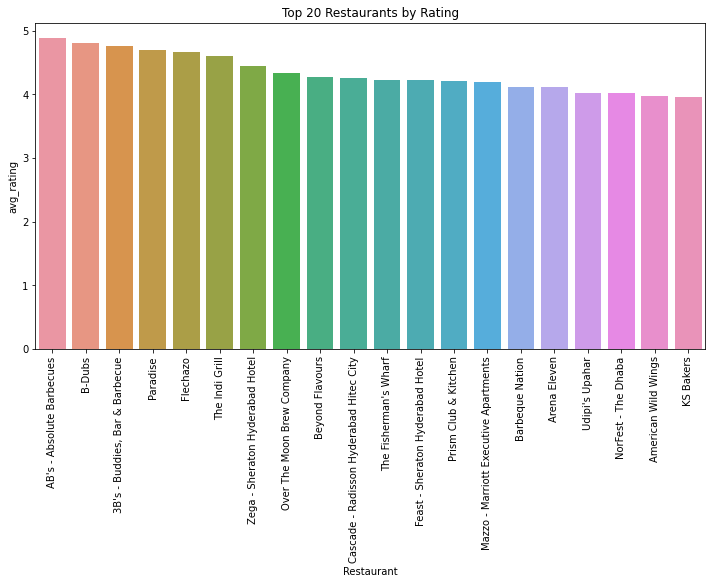

In [57]:
plt.figure(figsize=(12,6))
sns.barplot(data=by_rating[:20], x='Restaurant', y='avg_rating')
plt.title('Top 20 Restaurants by Rating')
plt.xticks(rotation='vertical')
plt.show()

In [58]:
by_reviews = df.groupby('Reviewer')['reviews'].mean().reset_index().sort_values(by='reviews',ascending=False)
by_reviews.columns=['Reviewer','avg_reviews']
by_reviews.head(10)

,Reviewer,avg_reviews
765,Anvesh Chowdary,1031.0
7389,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,685.0
79,Abc098,665.0
3234,Mithun Ravindranathan,560.0
3280,Mohd Zubair Ali (Hyderabad.Food.Diaries),482.0
1172,Bhargava Krishna,472.0
1707,Epicurean Tales,452.0
4367,Raghu,443.0
62,Aarti Kamath,417.0
5770,Shrishail Deshnur,414.0


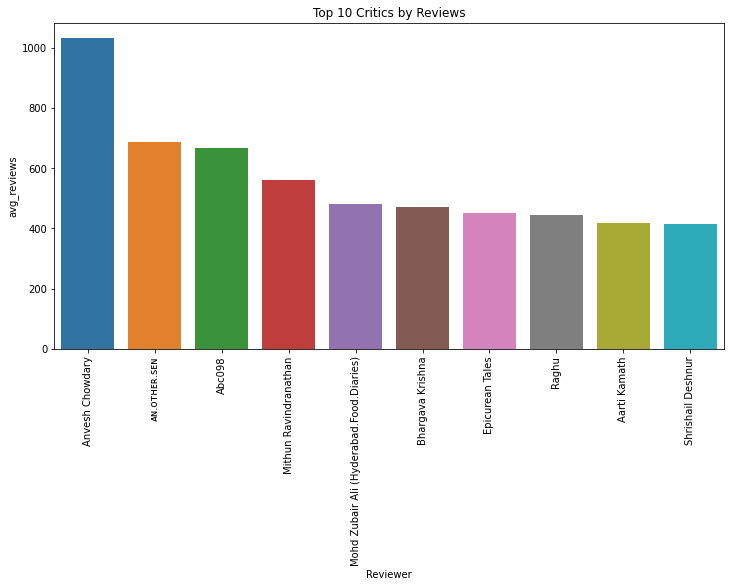

In [59]:
plt.figure(figsize=(12,6))
sns.barplot(data=by_reviews[:10],x='Reviewer', y='avg_reviews')
plt.title('Top 10 Critics by Reviews')
plt.xticks(rotation='vertical')
plt.show()